In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import sleep
import requests
import re
import time
import random

In [2]:
!pip install urllib3==1.25.11
agents = [
        "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:17.0; Baiduspider-ads) Gecko/17.0 Firefox/17.0",
        "Mozilla/5.0 (Linux; U; Android 2.3.6; en-us; Nexus S Build/GRK39F) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "HTC_Dream Mozilla/5.0 (Linux; U; Android 1.5; en-ca; Build/CUPCAKE) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1",
        "Mozilla/5.0 (hp-tablet; Linux; hpwOS/3.0.2; U; de-DE) AppleWebKit/534.6 (KHTML, like Gecko) wOSBrowser/234.40.1 Safari/534.6 TouchPad/1.0",
        "Mozilla/5.0 (Linux; U; Android 1.5; en-us; sdk Build/CUPCAKE) AppleWebkit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1",
        "Mozilla/5.0 (Linux; U; Android 2.1; en-us; Nexus One Build/ERD62) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "Mozilla/5.0 (Linux; U; Android 1.5; en-us; htc_bahamas Build/CRB17) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1",
        "Mozilla/5.0 (Linux; U; Android 2.1-update1; de-de; HTC Desire 1.19.161.5 Build/ERE27) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Sprint APA9292KT Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "Mozilla/5.0 (Linux; U; Android 1.5; de-ch; HTC Hero Build/CUPCAKE) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1",
        "Mozilla/5.0 (Linux; U; Android 2.2; en-us; ADR6300 Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "Mozilla/5.0 (Linux; U; Android 2.1; en-us; HTC Legend Build/cupcake) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 1.5; de-de; HTC Magic Build/PLAT-RC33) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1 FirePHP/0.3",
        "Mozilla/5.0 (Linux; U; Android 1.6; en-us; HTC_TATTOO_A3288 Build/DRC79) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1",
        "Mozilla/5.0 (Linux; U; Android 1.0; en-us; dream) AppleWebKit/525.10  (KHTML, like Gecko) Version/3.0.4 Mobile Safari/523.12.2",
        "Mozilla/5.0 (Linux; U; Android 1.5; en-us; T-Mobile G1 Build/CRB43) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari 525.20.1",
        "Mozilla/5.0 (Linux; U; Android 1.5; en-gb; T-Mobile_G2_Touch Build/CUPCAKE) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1",
        "Mozilla/5.0 (Linux; U; Android 2.0; en-us; Droid Build/ESD20) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Droid Build/FRG22D) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "Mozilla/5.0 (Linux; U; Android 2.0; en-us; Milestone Build/ SHOLS_U2_01.03.1) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 2.0.1; de-de; Milestone Build/SHOLS_U2_01.14.0) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 3.0; en-us; Xoom Build/HRI39) AppleWebKit/525.10  (KHTML, like Gecko) Version/3.0.4 Mobile Safari/523.12.2",
        "Mozilla/5.0 (Linux; U; Android 0.5; en-us) AppleWebKit/522  (KHTML, like Gecko) Safari/419.3",
        "Mozilla/5.0 (Linux; U; Android 1.1; en-gb; dream) AppleWebKit/525.10  (KHTML, like Gecko) Version/3.0.4 Mobile Safari/523.12.2",
        "Mozilla/5.0 (Linux; U; Android 2.0; en-us; Droid Build/ESD20) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 2.1; en-us; Nexus One Build/ERD62) AppleWebKit/530.17 (KHTML, like Gecko) Version/4.0 Mobile Safari/530.17",
        "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Sprint APA9292KT Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "Mozilla/5.0 (Linux; U; Android 2.2; en-us; ADR6300 Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "Mozilla/5.0 (Linux; U; Android 2.2; en-ca; GT-P1000M Build/FROYO) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1",
        "Mozilla/5.0 (Linux; U; Android 3.0.1; fr-fr; A500 Build/HRI66) AppleWebKit/534.13 (KHTML, like Gecko) Version/4.0 Safari/534.13",
        "Mozilla/5.0 (Linux; U; Android 3.0; en-us; Xoom Build/HRI39) AppleWebKit/525.10  (KHTML, like Gecko) Version/3.0.4 Mobile Safari/523.12.2",
        "Mozilla/5.0 (Linux; U; Android 1.6; es-es; SonyEricssonX10i Build/R1FA016) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1",
        "Mozilla/5.0 (Linux; U; Android 1.6; en-us; SonyEricssonX10i Build/R1AA056) AppleWebKit/528.5  (KHTML, like Gecko) Version/3.1.2 Mobile Safari/525.20.1"
    ]
heads = {
        # ip代理池获取时用的url的headers
    'User-Agent': random.choice(agents),
    'ue': 'utf-8'  # 设置翻译支持中文
}
proxy = '127.0.0.1:7890'
proxies = {
    'http':'http://'+proxy,
    'https':'https://'+proxy,
}
requests.adapters.DEFAULT_RETRIES=5
s=requests.session()
s.keep_alive=False

In [3]:
def Distinct(data_list):
    res_list=[]
    for one in data_list:
        if not one in res_list:
            res_list.append(one)
    return res_list

In [60]:
ftypelist=['ndbg','gszc','gzbc','lsgg']#设定要爬取的公告类型
stockid = "600519"
notices_url_list=[]#创建一个存放url的列表
notices_class_list=[]#创建一个存放类型的列表
notices_title_list=[]#创建一个存放标题的列表
while len(notices_url_list) < 100:#一个公司股票爬取100条左右
        # 解析列表页（使用BeautifulSoup）
    for ftype in ftypelist:
        pageno=1
        type_url=f"https://vip.stock.finance.sina.com.cn/corp/view/vCB_AllBulletin.php?stockid={stockid}&Page={pageno}&ftype={ftype}"
        text = BeautifulSoup(requests.get(type_url,headers=heads,verify=True).text,"html.parser")
        #time.sleep(2)
        notices = text.find('div', attrs={"class":"datelist"})
        #print(notices)
        if notices != None:
            for notice in notices.find_all('a'):
                notices_url_list += [notice['href']]
                notices_title_list+=[notice.text]
                notices_class_list+=[ftype]
                #notices_url_list=Distinct(notices_url_list)#清除重复项
            pageno+=1
        else:
            break

In [59]:
notices_class_list

['ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'lsgg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'ndbg',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gszc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 'gzbc',
 

In [61]:
stockid = "000825"
while len(notices_url_list) < 200:#在100多的基础上额外增加数据
        # 解析列表页（使用BeautifulSoup）
    for ftype in ftypelist:
        pageno=1
        type_url=f"https://vip.stock.finance.sina.com.cn/corp/view/vCB_AllBulletin.php?stockid={stockid}&Page={pageno}&ftype={ftype}"
        text = BeautifulSoup(requests.get(type_url,headers=heads,verify=True).text,"html.parser")
        #time.sleep(2)
        notices = text.find('div', attrs={"class": "datelist"})
        #print(notices)
        if notices!= None:
            for notice in notices.find_all('a'):
                notices_url_list += [notice['href']]
                notices_title_list+=[notice.text]
                notices_class_list+=[ftype]
                #notices_url_list=Distinct(notices_url_list)#清除重复项
            pageno += 1
        else:
            break

In [62]:
stockid = "601318"
while len(notices_url_list) < 300:#在200多的基础上额外增加数据
        # 解析列表页（使用BeautifulSoup）
    for ftype in ftypelist:
        pageno=1
        type_url=f"https://vip.stock.finance.sina.com.cn/corp/view/vCB_AllBulletin.php?stockid={stockid}&Page={pageno}&ftype={ftype}"
        text = BeautifulSoup(requests.get(type_url,headers=heads,verify=True).text,"html.parser")
        #time.sleep(2)
        notices = text.find('div', attrs={"class": "datelist"})
        #print(notices)
        if notices!= None:
            for notice in notices.find_all('a'):
                notices_url_list += [notice['href']]
                notices_title_list+=[notice.text]
                notices_class_list+=[ftype]
                #notices_url_list=Distinct(notices_url_list)#清除重复项
            pageno += 1
        else:
            break

In [63]:
stockid = "002594"
while len(notices_url_list) < 400:#在300多的基础上额外增加数据
        # 解析列表页（使用BeautifulSoup）
    for ftype in ftypelist:
        pageno=1
        type_url=f"https://vip.stock.finance.sina.com.cn/corp/view/vCB_AllBulletin.php?stockid={stockid}&Page={pageno}&ftype={ftype}"
        text = BeautifulSoup(requests.get(type_url,headers=heads,verify=True).text,"html.parser")
        #time.sleep(2)
        notices = text.find('div', attrs={"class": "datelist"})
        #print(notices)
        if notices!= None:
            for notice in notices.find_all('a'):
                notices_url_list += [notice['href']]
                notices_title_list+=[notice.text]
                notices_class_list+=[ftype]
                #notices_url_list=Distinct(notices_url_list)#清除重复项
            pageno += 1
        else:
            break

In [71]:
notices_url_list

['/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=7946578',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=7946575',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=7000646',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=6083321',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=5130113',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=4160557',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=3233665',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=2269811',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=1729658',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=1327704',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=1075219',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=879686',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=694733',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=677529',
 '/corp/view/vCB_AllBulletinDetail.php?stockid=600519&id=532106',

In [82]:
notices_content_list=[]
reg = re.compile('<[^>]>')#用于之后的仅保留正文
    # 完成下面部分的代码
i=0
for i in range(len(notices_url_list)):
    notice_url = f"https://vip.stock.finance.sina.com.cn{notices_url_list[i]}"
    time.sleep(0.5)
    notice_page = BeautifulSoup(requests.get(notice_url).text,"html.parser")#对每一条公告对进行具体爬取
    notice_content = notice_page.find('div',attrs={'id':'content'}).text#抓取正文
    content=reg.sub('',notice_content)
    #print(notice_content)#输出看看是不是有问题
    #print(i)
    notices_content_list+=[content]
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [83]:
len(notices_class_list)#看看数量合不合适
len(notices_url_list)
len(notices_title_list)
len(notices_content_list)

443

In [477]:
result={'title':notices_title_list,'url':notices_url_list,'content':notices_content_list,'class':notices_class_list}
data=pd.DataFrame(result)
data.head(10)


,title,url,content,class
0,贵州茅台：贵州茅台2021年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,ndbg
1,贵州茅台：贵州茅台2021年年度报告（英文版）,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\nStock Code: 600519 ...,ndbg
2,贵州茅台：贵州茅台2020年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,ndbg
3,贵州茅台2019年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,ndbg
4,贵州茅台2018年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,ndbg
5,贵州茅台2017年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n2017 年年度报告\r\n公司代码：600519 ...,ndbg
6,贵州茅台2016年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n2016 年年度报告\r\n公司代码：600519 ...,ndbg
7,贵州茅台年报,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n2015 年年度报告\r\n公司代码：600519 ...,ndbg
8,贵州茅台酒股份有限公司年报,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公告内容详见附件,ndbg
9,贵州茅台酒股份有限公司2013年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n贵州茅台酒股份有限公司\r\n 600519\r\n 2013 年年度报告\r...,ndbg


In [478]:
#把公告类型改成中文
data['class'][data['class']=='ndbg']='年度报告'
data['class'][data['class']=='gszc']='公司章程'
data['class'][data['class']=='gzbc']='更正或补充'
data['class'][data['class']=='lsgg']='临时公告'

In [479]:
data.head()

,title,url,content,class
0,贵州茅台：贵州茅台2021年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,年度报告
1,贵州茅台：贵州茅台2021年年度报告（英文版）,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\nStock Code: 600519 ...,年度报告
2,贵州茅台：贵州茅台2020年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,年度报告
3,贵州茅台2019年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,年度报告
4,贵州茅台2018年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,年度报告


In [480]:
your_name="钟东彤"
your_student_no="2020200883"
data.to_csv(f'/Users/tiancaixiaohuoban/Desktop/高礼/互联网与文本分析/lec05/hw4_{your_name}_{your_student_no}_stock_notices_{len(data)}条.csv',encoding='utf-8')

<AxesSubplot:xlabel='class', ylabel='Count'>

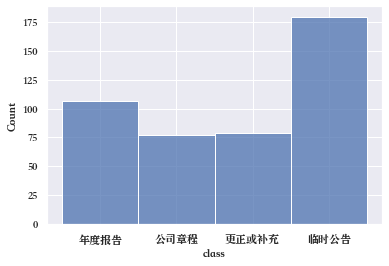

In [481]:
import seaborn as sns
import matplotlib as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'/System/Library/Fonts/Supplemental/Songti.ttc',size=14)
sns.set(font=myfont.get_name())
sns.histplot(data=data, x="class",kde=False, palette='muted',bins=20,shrink=1,discrete=True)

In [482]:
#引入相关库
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# 两个主题分析模型：LDA模型,基于截断的SVD模型
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import numpy as np
import random

In [483]:
import jieba

In [486]:
data['class_id'] = data['class'].factorize()[0]
#对类别转换为数字，方便模型训练
data[['class_id','class']].sample(10)

,class_id,class
6,0,年度报告
317,1,公司章程
400,2,更正或补充
358,3,临时公告
323,1,公司章程
153,0,年度报告
120,3,临时公告
106,2,更正或补充
212,3,临时公告
149,0,年度报告


In [487]:
jieba.add_word('银保监会')
jieba.add_word('贵州茅台')
jieba.add_word('中国平安')
jieba.add_word('比亚迪')
jieba.add_word('经常性损益')
jieba.add_word('会计师事务所')
jieba.add_word('太钢不锈')

def word_cut (texts):
    words_list = []
    word_generator = jieba.cut(texts, cut_all=False)  # 返回的是一个迭代器
    with open('/Users/tiancaixiaohuoban/Desktop/高礼/互联网与文本分析/lec04/notebooks/Jieba-Tokenizer/hit_stopwords.txt') as f:
        str_text = f.read()
    for word in word_generator:
        if word.strip() not in str_text:
            words_list.append(word)
            #print ('1')
    return ' '.join(words_list)  # 注意是空格

In [488]:
data['cut_content'] = data.content.apply(word_cut)

In [489]:
#载入数据
#标签为公告类别，特征来自对公告文本的分析
X=data['cut_content']
y=data['class_id']#设置标签
# 打乱数据
randnum = random.randint(0,100)
random.seed(randnum)
random.shuffle(X)
random.seed(randnum)
random.shuffle(y)
#print(X[:1])
#print(y[:1])

/Users/tiancaixiaohuoban/opt/anaconda3/lib/python3.8/random.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [490]:
#划分训练集和测试集,按照测试集：训练集=2:8的比例
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [491]:
# 限制作为特征的单词个数
n_features = 1000
with open('/Users/tiancaixiaohuoban/Desktop/高礼/互联网与文本分析/lec04/notebooks/Jieba-Tokenizer/hit_stopwords.txt') as f:
    STOPWORDS = f.read()
    STOPWORDS = STOPWORDS.split('\n')
stop_list=list(STOPWORDS)

In [492]:
#print(stop_list)

In [493]:
# 利用CountVectorizer将文本表示成向量的形式
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=5, max_features=n_features, stop_words=stop_list, ngram_range=(1, 2))
tf = tf_vectorizer.fit_transform(X_train)
features = pd.DataFrame(tf.toarray(), columns=tf_vectorizer.get_feature_names())
features.head()

/Users/tiancaixiaohuoban/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '下载公告', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,001,002,003,01,02,03,03 28,04,05,06,...,项目 期末余额,项目 本期发生,预期,预期 信用,预计,领域,风险,风险管理,首席,香港
0,0,0,0,0,3,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5,11,7,53,35,36,1,147,58,51,...,35,26,11,0,30,3,112,8,0,30
2,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,15,5,9,11,1,0,8,15,7,...,0,0,119,62,39,52,675,190,72,66


In [494]:
# 利用TfidfVectorizer将文本表示成向量的形式

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, 
                                   max_features=n_features, stop_words=stop_list, ngram_range=(1, 2))
tfidf = tfidf_vectorizer.fit_transform(X_train)
features = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
features.head()

/Users/tiancaixiaohuoban/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '下载公告', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,001,002,003,01,02,03,03 28,04,05,06,...,项目 期末余额,项目 本期发生,预期,预期 信用,预计,领域,风险,风险管理,首席,香港
0,0.000000,0.000000,0.000000,0.000000,0.038101,0.035600,0.000000,0.000000,0.011054,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003904,0.008723,0.005551,0.037585,0.024219,0.023276,0.001138,0.099933,0.034933,0.034671,...,0.030864,0.022481,0.007705,0.000000,0.018798,0.002169,0.063529,0.005860,0.000000,0.016229
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072180,0.162942,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.005300,0.005767,0.001922,0.003095,0.003691,0.000313,0.000000,0.002637,0.004380,0.002307,...,0.000000,0.000000,0.040413,0.027358,0.011849,0.018226,0.185641,0.067476,0.027258,0.017312


In [495]:
#利用朴素贝叶斯分类器
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # 构建一个分类器
nb.fit(tf, y_train) #用训练集训练分类器
X_test_tf = tf_vectorizer.transform(X_test) #embedding测试集
y_predict = nb.predict(X_test_tf) # 利用测试集去做预测

from sklearn.metrics import classification_report
print("测试集上其他指标：\n",classification_report(y_test, y_predict))

测试集上其他指标：
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.52      0.69      0.59        16
           2       0.39      0.52      0.45        21
           3       0.72      0.38      0.50        34

    accuracy                           0.57        89
   macro avg       0.59      0.62      0.59        89
weighted avg       0.61      0.57      0.57        89



In [496]:
nb.fit(tfidf, y_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_predict = nb.predict(X_test_tfidf)

from sklearn.metrics import classification_report
print("测试集上其他指标：\n",classification_report(y_test, y_predict))

测试集上其他指标：
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.67      0.88      0.76        16
           2       1.00      0.14      0.25        21
           3       0.71      0.94      0.81        34

    accuracy                           0.74        89
   macro avg       0.81      0.73      0.68        89
weighted avg       0.80      0.74      0.69        89



In [497]:
n_features = 1000
n_components = 4
n_top_words = 50

In [498]:
lsa_topics = ['临时公告', '公司章程', '年度报告', '更正或补充']
lda_topics = ['临时公告', '公司章程', '年度报告', '更正或补充']

In [499]:
lsa = TruncatedSVD(n_components=n_components, random_state=1, algorithm='arpack').fit(tfidf)

In [500]:
lda = LatentDirichletAllocation(n_components=n_components, random_state=1).fit(tf)

In [501]:
def get_model_topics(model, vectorizer, topics, n_top_words=n_top_words):
    word_dict = {}
    feature_names = vectorizer.get_feature_names() # 返回词组列表
    #∣V∣为单词个数，∣T∣为SVD降维后的主题个数。
    # model.components是一个大小为(∣T∣,∣V∣)的矩阵，
    # 每一行为主题在每个单词上的分布。我们可以通过这个矩阵得到哪些词对主题t贡献最大。
    # 也就是说topic_idx的取值是4个topics，topic
    for topic_idx, topic in enumerate(model.components_):
        #表示对数据进行从大到小（最后有-1是从大到小，没有是从小到大）进行排序,返回数据的索引值
        #-n_top_words - 1：指取前50个index
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind] # 取词组
        word_dict[topics[topic_idx]] = top_features #存成字典的形式

    return pd.DataFrame(word_dict)

In [502]:
get_model_topics(lsa, tfidf_vectorizer, lsa_topics)

,临时公告,公司章程,年度报告,更正或补充
0,股东,比亚迪,贵州茅台,比亚迪
1,股东大会,项目,贵州茅台 股份,会议
2,董事会,贵州茅台,贵州省,委员会
3,股份,汽车,董事会,董事会
4,会议,投资,会议,比亚迪 股份
5,规定,年度报告,委员会,审议
6,召开,金额,年度报告,召开
7,贵州茅台,价值,注册,汽车
8,监事,人民币,会计师事务所,股份
9,比亚迪,资产,地址,中国 平安保险


In [503]:
get_model_topics(lda, tf_vectorizer, lda_topics)

,临时公告,公司章程,年度报告,更正或补充
0,贵州茅台,股东,比亚迪,项目
1,投资,股东大会,汽车,资产
2,业务,董事会,资产,投资
3,平安,股份,人民币,金额
4,风险,规定,千元,价值
5,资产,会议,股份,合计
6,管理,监事,投资,销售
7,价值,决议,价值,负债
8,中国,事项,31,收益
9,股份,监事会,证券报,本期


In [504]:
def get_inference(model, vectorizer, topics, text, threshold):
    # 这个函数的意思是：输入任意一个文本，给它判断主题
    v_text = vectorizer.transform([text]) #embedding
    score = model.transform(v_text) #用模型对这个文本打分判断主题
    labels = set() 
    for i in range(len(score[0])):
        if score[0][i] > threshold: #设置一个阈值，只有模型评分高于阈值才有机会给它赋予主题
            labels.add(topics[i])

    if not labels:
        return 'None', -1, set()

    return topics[np.argmax(score)], score, labels

In [505]:
text=str(data['content'].iloc[0])
topic, score, labels = get_inference(lsa, tfidf_vectorizer, lsa_topics, text, 0)
print(topic)
print(score)

公司章程
[[ 0.07416511  0.14686755  0.06255198 -0.07995221]]


In [506]:
topic, score, labels = get_inference(lda, tf_vectorizer, lda_topics, text, 0)
print(topic)
print(score)

临时公告
[[5.49322899e-01 2.62373192e-04 2.69000012e-04 4.50145728e-01]]


In [507]:
lda_vec = lda.transform(tf)
nb.fit(lda_vec, y_train)

lda_test_vec = lda.transform(X_test_tf)
y_predict = nb.predict(lda_test_vec)

from sklearn.metrics import classification_report
print("测试集上其他指标：\n",classification_report(y_test, y_predict))

测试集上其他指标：
               precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        21
           3       0.42      0.91      0.57        34

    accuracy                           0.46        89
   macro avg       0.27      0.37      0.30        89
weighted avg       0.29      0.46      0.34        89



/Users/tiancaixiaohuoban/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [508]:
#多个机器学习模型的对比
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

features = tfidf.fit_transform(data.cut_content)
labels = data.class_id
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

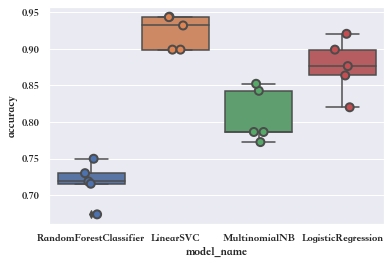

In [509]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [510]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.923315
LogisticRegression        0.875919
MultinomialNB             0.808146
RandomForestClassifier    0.717901
Name: accuracy, dtype: float64

In [511]:
class_id_df = data[['class', 'class_id']].drop_duplicates().sort_values('class_id').reset_index(drop=True)
class_to_id = dict(class_id_df.values)
id_to_class = dict(class_id_df[['class_id', 'class']].values)
data.sample(10)

,title,url,content,class,class_id,cut_content
73,贵州茅台：贵州茅台2020年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公司代码：600519 ...,年度报告,0,年度报告 代码 600519 贵州茅台 贵州茅台 酒 股份 年度报告 重要 提示 董事会 监...
401,比亚迪：关于修改股东大会议事规则的公告,/corp/view/vCB_AllBulletinDetail.php?stockid=0...,\n比亚迪股份有限公司关于修改股东大会议事规则的公告本公司及董事会全体成员保证信息披露的内容...,更正或补充,0,山西 太钢不锈 钢 股份 SHANXI TAIGANG STAINLESS STEEL CO...
303,比亚迪：H股年报,/corp/view/vCB_AllBulletinDetail.php?stockid=0...,\n公告内容详见附件,年度报告,3,中国 平安保险 股份 披露 平安 银行 第三季度 报告 中国 平安保险 股份 董事会 全体 ...
226,中国平安2019年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n二零一九年年报\r\n 目录\r\n 关于我们 ...,年度报告,3,比亚迪 股份 持股 5% 股东 部分 股份 解除 质押 董事会 全体成员 保证 信息 披露 ...
302,比亚迪：2020年年度报告,/corp/view/vCB_AllBulletinDetail.php?stockid=0...,\n比亚迪股份有限公司2020年年度报告2021年03月第一节 重要提示、目录和释义公司董事...,年度报告,3,中国 平安保险 股份 第十二届 董事会 第十二次 会议 决议 中国 平安保险 股份 董事会 ...
50,贵州茅台：关于职工董事选举结果的公告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n公告内容详见附件,临时公告,2,代码 002594 比亚迪 编号 059 比亚迪 股份 完成 工商 变更 修改 董事会 全体...
97,贵州茅台章程（2018年9月修订）,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n贵州茅台酒股份有限公司章程2018年9月修订目录第一章总则 ...... 3第二章经营...,公司章程,0,代码 600519 贵州茅台 贵州茅台 酒 股份 年度报告 重要 提示 董事会 监事会 监事...
267,中国平安保险(集团)股份有限公司关于2014年第一季度报告可转债相关情况的补充公告,/corp/view/vCB_AllBulletinDetail.php?stockid=6...,\n证券代码：113005 证券简称：平安转债 \n中国平安保险（集团）股份有限公司 \...,更正或补充,1,比亚迪 股份 修订案 中国证券监督管理委员会 证监局 下发 认真 贯彻落实 一步 落实 现金...
203,太钢不锈：独立董事提名人声明(刘新权),/corp/view/vCB_AllBulletinDetail.php?stockid=0...,\n证券代码：000825 证券简称：太钢不锈 公告编号：2022-067山西太...,临时公告,1,中国 平安保险 股份 注册 地址 变更 中国 平安保险 股份 董事会 全体 保证 虚假 记载...
402,比亚迪：关于修改公司章程的公告,/corp/view/vCB_AllBulletinDetail.php?stockid=0...,\n证券代码：002594 证券简称：比亚迪 公告编号：2...,更正或补充,3,代码 600519 贵州茅台 编号 贵州茅台 酒 股份 权益 分派 实施 董事会 全体 保证...
